# 4. Model의 Training과정을 확인과 Keras의 Callback 기능

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y= keras.utils.to_categorical(iris.target, 3)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Epoch 1/1000
11/11 [==============================] - 1s 40ms/step - loss: 0.9685 - accuracy: 0.3236 - val_loss: 0.9161 - val_accuracy: 0.4222
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.8834 - accuracy: 0.4461 - val_loss: 0.8838 - val_accuracy: 0.4889
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.9274 - accuracy: 0.5085 - val_loss: 0.8572 - val_accuracy: 0.5556
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.9076 - accuracy: 0.5860 - val_loss: 0.8372 - val_accuracy: 0.6000
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.8862 - accuracy: 0.6745 - val_loss: 0.8211 - val_accuracy: 0.6000
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.8437 - accuracy: 0.6654 - val_loss: 0.8057 - val_accuracy: 0.6000
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.8282 - accuracy: 0.6601 - val_loss: 0.7916 - val_accuracy: 0.6000
Epoch

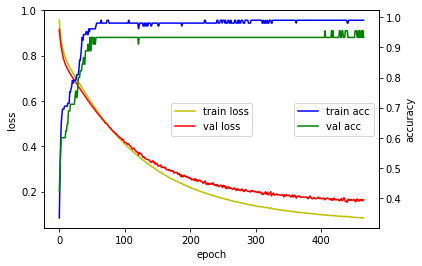

Test loss: 0.16355735063552856
Test accuracy: 0.9333333373069763


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

hist=model.fit(x_train, y_train,
          batch_size=10,
          epochs=1000,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
decoder = {k:v for k,v in enumerate( iris.target_names )}

In [ ]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# 이제 Hyper Parameter를 수정해서 모델의 성능을 높이고 싶다. 